# 

In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images/ImageClassification/Happy People/vector4.svg
/kaggle/input/images/ImageClassification/Happy People/of-diverse-friends-hang-out-in-the-city-young-people-lifestyle-concept-photo.jpg
/kaggle/input/images/ImageClassification/Happy People/friends-happy-190821.jpg
/kaggle/input/images/ImageClassification/Happy People/GettyImages-871518740.jpg
/kaggle/input/images/ImageClassification/Happy People/23451820-summer-holidays-vacation-happy-people-concept-group-of-friends-jumping-on-the-beach.jpg
/kaggle/input/images/ImageClassification/Happy People/hand-drawn-youth-day-jumping-people_23-2148569492.jpg
/kaggle/input/images/ImageClassification/Happy People/1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg
/kaggle/input/images/ImageClassification/Happy People/image23.jpeg
/kaggle/input/images/ImageClassification/Happy People/360_F_582239379_7n6b6kBXogmFRvSz5Ncgr7aQrZBEcO1p.jpg
/kaggle/input/images/ImageClassification/Happy People/60559873-happy-young-people-taking-selfies-in

In [14]:
!pip install tensorflow-gpu opencv-python matplotlib


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu (from versions: none)
ERROR: No matching distribution found for tensorflow-gpu


In [30]:
!pip show tensorflow


Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [31]:

import tensorflow as tf
print(tf.__version__)


2.17.1


In [32]:
!pip list

Package                            Version              Editable project location
---------------------------------- -------------------- -------------------------
absl-py                            1.4.0
accelerate                         1.2.1
aiobotocore                        2.17.0
aiofiles                           22.1.0
aiohappyeyeballs                   2.4.4
aiohttp                            3.11.10
aioitertools                       0.12.0
aiosignal                          1.3.2
aiosqlite                          0.20.0
alabaster                          1.0.0
albucore                           0.0.19
albumentations                     1.4.20
alembic                            1.14.0
altair                             5.5.0
annotated-types                    0.7.0
annoy                              1.17.3
ansicolors                         1.1.8
antlr4-python3-runtime             4.9.3
anyio                              3.7.1
argon2-cffi                        23.1.0
argon

In [33]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [34]:
os.path.join('data','happy')

'data/happy'

In [35]:
import os
print(os.getcwd())


/kaggle/working


In [36]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [37]:
len(gpus)

2

In [38]:
#Avoid oom errors by setting GPU memory consumption growth
import tensorflow as tf

# Avoid OOM errors by setting memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


In [39]:
import cv2
import imghdr

In [40]:
data_dir = '/kaggle/input/images/ImageClassification'

In [41]:
happy_dir = os.path.join(data_dir, 'Happy People')
sad_dir = os.path.join(data_dir, 'Sad People')
print(os.listdir(happy_dir))
print(os.listdir(sad_dir))


['vector4.svg', 'of-diverse-friends-hang-out-in-the-city-young-people-lifestyle-concept-photo.jpg', 'friends-happy-190821.jpg', 'GettyImages-871518740.jpg', '23451820-summer-holidays-vacation-happy-people-concept-group-of-friends-jumping-on-the-beach.jpg', 'hand-drawn-youth-day-jumping-people_23-2148569492.jpg', '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg', 'image23.jpeg', '360_F_582239379_7n6b6kBXogmFRvSz5Ncgr7aQrZBEcO1p.jpg', '60559873-happy-young-people-taking-selfies-in-city.jpg', 'vector3.svg', 'getty_478389113_970647970450091_99776.jpg', 'image9.jpeg', 'Super-Happy-People-yay.jpg', 'image21.jpeg', 'image27.jpeg', 'nm-how-happiness-affects-health-tnail.jpg', 'vector7.svg', 'image18.jpeg', 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg', 'diverse-friends-students-shoot_53876-47012.jpg', 'smiling-young-african-american-woman-260nw-2290057229.jpg', 'IMG_20210827_200655.jpg', 'image14.jpeg', 'vector9.svg', '-in-svg-png-gif-file-formats--group-crowd-smiling-pack-illustrations-698

In [42]:
os.listdir(data_dir)

['Happy People', 'Sad People']

In [43]:
image_exts = ['jpeg','jpg','bmp','png']
print(image_exts)

['jpeg', 'jpg', 'bmp', 'png']


In [44]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image is not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image is not in ext list /kaggle/input/images/ImageClassification/Happy People/vector4.svg
Issue with image /kaggle/input/images/ImageClassification/Happy People/vector4.svg
Image is not in ext list /kaggle/input/images/ImageClassification/Happy People/vector3.svg
Issue with image /kaggle/input/images/ImageClassification/Happy People/vector3.svg
Image is not in ext list /kaggle/input/images/ImageClassification/Happy People/getty_478389113_970647970450091_99776.jpg
Issue with image /kaggle/input/images/ImageClassification/Happy People/getty_478389113_970647970450091_99776.jpg
Image is not in ext list /kaggle/input/images/ImageClassification/Happy People/vector7.svg
Issue with image /kaggle/input/images/ImageClassification/Happy People/vector7.svg
Image is not in ext list /kaggle/input/images/ImageClassification/Happy People/smiling-young-african-american-woman-260nw-2290057229.jpg
Issue with image /kaggle/input/images/ImageClassification/Happy People/smiling-young-african-american-woman

In [45]:
img = cv2.imread(os.path.join('/kaggle/input/images/ImageClassification','Happy People','smile.woman_.jpg'))


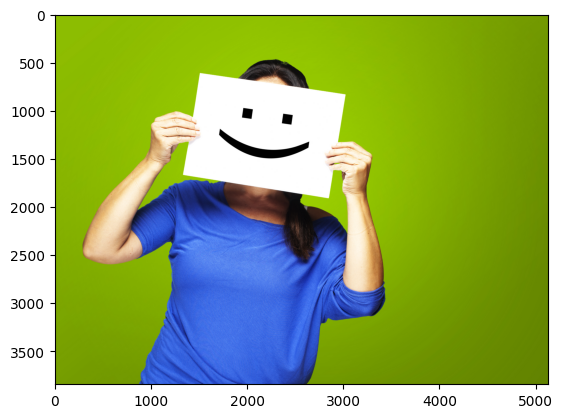

In [46]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [113]:
import numpy as np
from matplotlib import pyplot as plt 

In [114]:
#building a data pipe line
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/images/ImageClassification')

Found 228 files belonging to 2 classes.


In [117]:
#this is allowing us to access the data pipe line , i.e loop through it
data_iterator = data.as_numpy_iterator()

In [118]:
#this is grabbing one batch , run it again to get batch
batch = next(data_iterator)
print("Batch:", batch)
print("Type:", type(batch))
if isinstance(batch, tuple):
    print("Tuple length:", len(batch))
    for idx, element in enumerate(batch):
        print(f"Element {idx} shape:", element.shape)



Batch: (array([[[[ 89.25     ,  92.25     ,  73.25     ],
         [ 60.25     ,  62.25     ,  48.25     ],
         [ 54.25     ,  52.25     ,  39.25     ],
         ...,
         [  5.       ,  17.       ,  13.       ],
         [  6.       ,  18.       ,  14.       ],
         [  5.       ,  17.       ,  13.       ]],

        [[ 95.25     ,  98.25     ,  79.25     ],
         [ 63.25     ,  65.25     ,  51.25     ],
         [ 57.5      ,  58.5      ,  44.5      ],
         ...,
         [  6.       ,  18.       ,  14.       ],
         [  6.       ,  18.       ,  14.       ],
         [  5.       ,  17.       ,  13.       ]],

        [[ 97.       , 100.       ,  81.       ],
         [ 70.75     ,  72.75     ,  58.75     ],
         [ 70.75     ,  72.75     ,  58.75     ],
         ...,
         [  6.       ,  18.       ,  14.       ],
         [  6.       ,  18.       ,  14.       ],
         [  5.       ,  17.       ,  13.       ]],

        ...,

        [[ 18.5      ,  27.5  

In [119]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [120]:
#class 1 = sad people
#class 0 = happy people
batch[1]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int32)

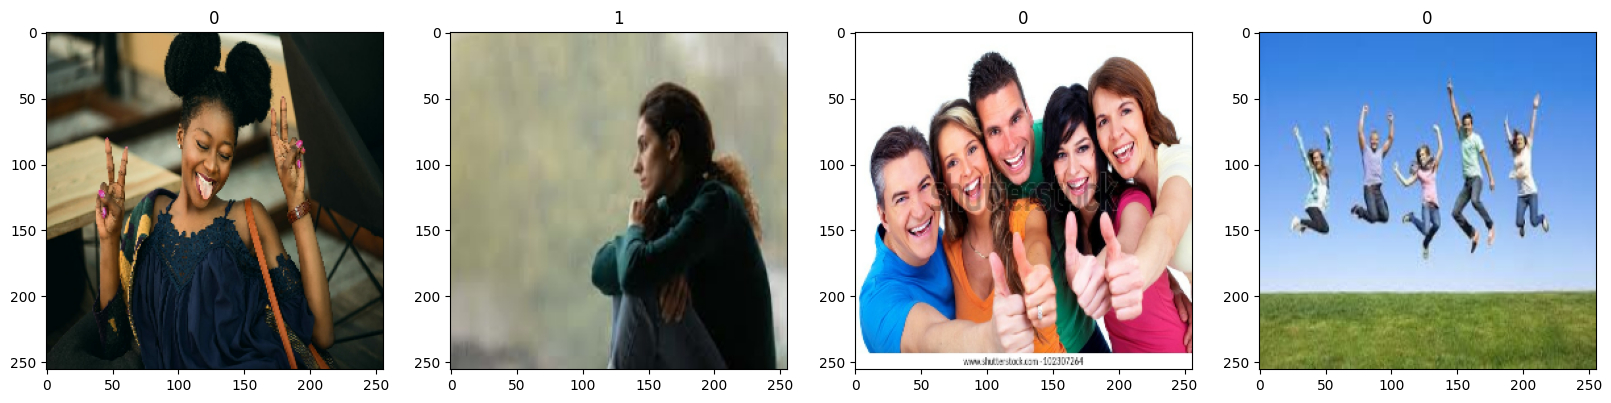

In [121]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [122]:
scaled = batch[0]/255
scaled.max()

1.0

In [123]:
data = data.map(lambda x,y : (x/255,y))

In [124]:
iterator = data.as_numpy_iterator()
try:
    batch = next(iterator)
    print(batch)
except Exception as e:
    print(f"Error: {e}")


Error: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 


In [125]:
scaled_iterator = data.as_numpy_iterator()

In [126]:
batch = scaled_iterator.next()


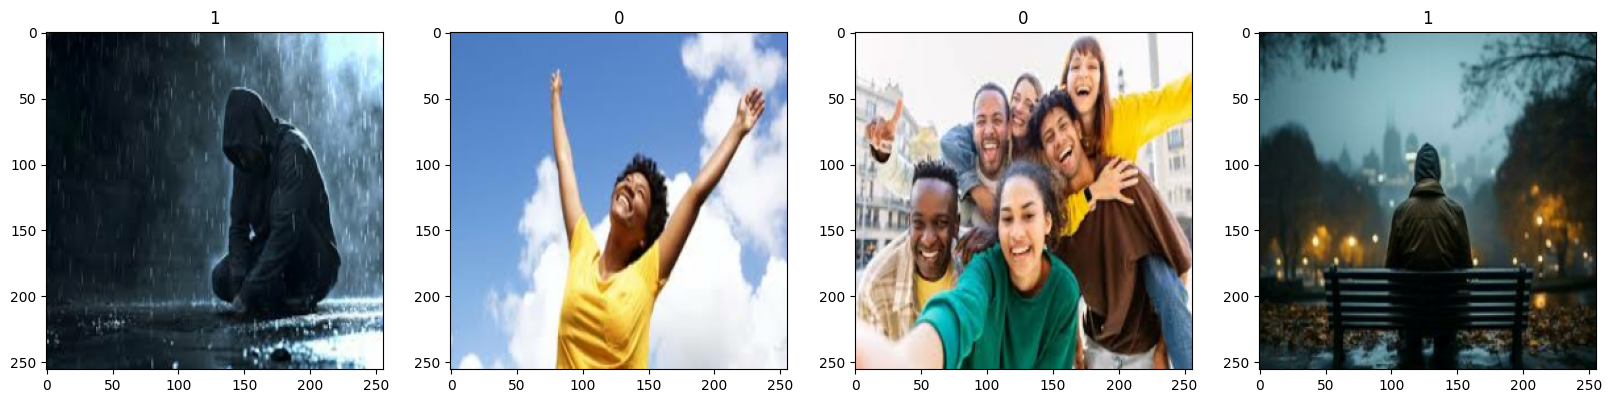

In [127]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [128]:
len(data)

8

In [129]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [130]:
train_size + val_size + test_size

8

In [131]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [167]:
len(test)

1

In [186]:
#3.1 Building deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [187]:
# initializing the model here
model = Sequential()

In [188]:
model.add(Conv2D(16,(3,3),strides = (1,1),activation = 'relu',input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),strides = (1,1),activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [190]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics = ['accuracy'])
#model.compile(optimizer='adam', 
            #  loss='sparse_categorical_crossentropy', 
              #metrics=['accuracy'])


In [191]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [209]:
logdir = 'logs'

In [210]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [231]:
hist = model.fit(train,epochs = 10 , validation_data = val , callbacks = [tensorboard_callback])

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_one_step_on_iterator_4903]

In [227]:
from PIL import Image
import os

def check_image_format(folder_path):
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(file_path)
            img.verify()  # Verify that the image is valid
        except Exception as e:
            print(f"Invalid image file: {file_path}, Error: {e}")

check_image_format("/kaggle/input/images/ImageClassification")
check_image_format("/kaggle/input/images/ImageClassification")


Invalid image file: /kaggle/input/images/ImageClassification/Happy People, Error: [Errno 21] Is a directory: '/kaggle/input/images/ImageClassification/Happy People'
Invalid image file: /kaggle/input/images/ImageClassification/Sad People, Error: [Errno 21] Is a directory: '/kaggle/input/images/ImageClassification/Sad People'
Invalid image file: /kaggle/input/images/ImageClassification/Happy People, Error: [Errno 21] Is a directory: '/kaggle/input/images/ImageClassification/Happy People'
Invalid image file: /kaggle/input/images/ImageClassification/Sad People, Error: [Errno 21] Is a directory: '/kaggle/input/images/ImageClassification/Sad People'
